In [1]:
using Condor

test_l_calculation_pol (generic function with 1 method)

In [2]:
nside = 16
lmax = 3nside -1
npix = nside2npix(nside)
res = Resolution(nside)
pointing_source = zeros(3, npix);

Here, we set the point source, which is the target of convolution integration.

Then, we get the point source $a_{\ell m}$

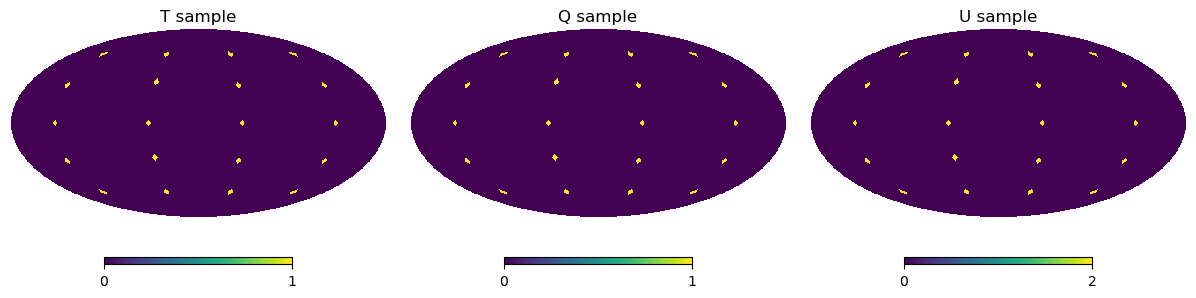

In [3]:
for theta in 30:30:150
    for phi in 45:90:360
        pix = ang2pixRing(res, deg2rad(theta), deg2rad(phi))
        pointing_source[1,pix] = 1
        pointing_source[2,pix] = 1
        pointing_source[3,pix] = 2
    end
end

plt.figure(figsize=[12, 8])
hp.mollview(pointing_source[1,:], sub = (1,3,1), title = "T sample")
hp.mollview(pointing_source[2,:], sub = (1,3,2), title = "Q sample", rot = (0,0))
hp.mollview(pointing_source[3,:], sub = (1,3,3), title = "U sample")

pointing_source_smoothing = hp.smoothing(pointing_source, fwhm = deg2rad(10))
pointing_source_alm = hp.map2alm(pointing_source);

Next, prepare the beam data to be used for convolution integration. In this case, a two-dimensional Gaussian beam is used.

The make_beam_TQU function calculates the TQU beam and map2alm it to $b_{\ell m}^{T}$, $b_{\ell m}^{E}$, $b_{\ell m}^{B}$.

In [4]:
Gauss_T = gauss_3d_xyz(npix, deg2rad(10), .0, 0.0, 1)
Gauss_map = make_beam_TQU(Gauss_T, npix, res)
Gauss_blm = hp.map2alm(Gauss_map, pol=true);

In the ideal case where the intensity and polarization components of the CMB are completely separated, the convolution integral of the Stokes parameter and the beam is calculated as follows

$$
\hat{T}(\theta, \phi) = \sum_{\ell m} a^{T}_{\ell m} \sum_{n}[ b^{T}_{\ell n} D_{mn}^{\ell}(\phi, \theta, \psi)]^\ast 
$$

$$
\hat{Q}+i\hat{U}(\theta, \phi) = \sum_{\ell m} {_{2}a}_{\ell m} \sum_{n}[ {_{2}b}_{\ell n} D_{mn}^{\ell}(\phi, \theta, \psi)]^\ast 
$$

$$
{_{2}b}_{\ell m} = -(b_{\ell m}^{E} +ib_{\ell m}^B)
$$

The following is the convolution calculation of the polarized beam for this sample program.

Here, convolution calculations are performed for each ℓ-component for a detector uniformly tilted by ψ at all pixels.

The required value of the ℓ-component varies depending on the fineness of the beam structure.

In [5]:
ψ = deg2rad(20)
convolved = test_l_calculation_pol(pointing_source_alm[2,:], pointing_source_alm[3,:], Gauss_blm[2,:], Gauss_blm[3,:], lmax, npix, 30, ψ);

l = 0
l = 1
l = 2
l = 3
l = 4
l = 5
l = 6
l = 7
l = 8
l = 9
l = 10
l = 11
l = 12
l = 13
l = 14
l = 15
l = 16
l = 17
l = 18
l = 19
l = 20
l = 21
l = 22
l = 23
l = 24
l = 25
l = 26
l = 27
l = 28
l = 29
l = 30


In the convolution integral, the relation between $\hat{Q}, \hat{U}$ and the original  $Q, U$  is as follows

$$
\begin{pmatrix}
\hat{Q}\\
\hat{U}
\end{pmatrix}
=
\begin{pmatrix}
\cos{2\psi}&\sin{2\psi}\\
-\sin{2\psi}&\cos{2\psi}
\end{pmatrix}
\begin{pmatrix}
Q\\
U
\end{pmatrix}
$$

Expressing this in complex numbers 𝑄̂ +𝑖𝑈̂ =exp(-2𝑖𝜓)(𝑄+𝑖𝑈) is the same as the following.

Therefore, by applying exp(2𝑖𝜓) to the result after convolution, we can obtain the convolution of the same 𝑄 and 𝑈 components as the original coordinates.

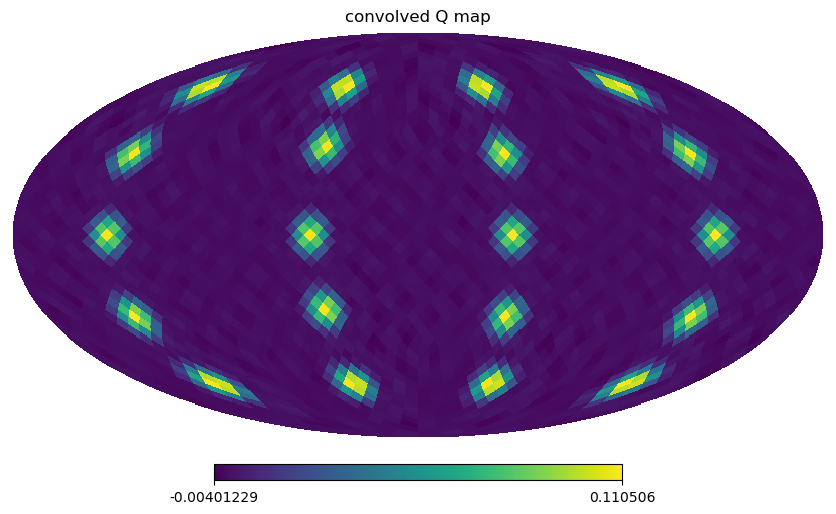

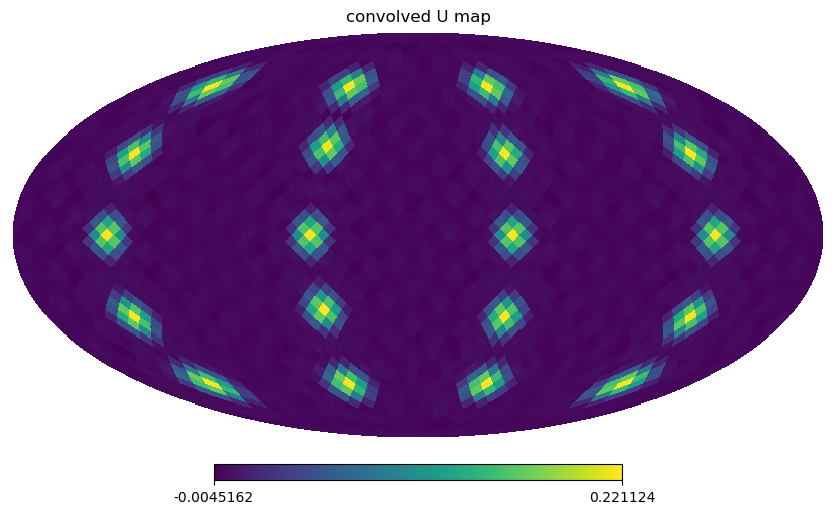

In [6]:
convolved_2 = exp(2im*ψ)*convolved

hp.mollview(real(convolved_2), title = "convolved Q map")
hp.mollview(imag(convolved_2), title = "convolved U map")